In [13]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

def plot_vectors_2d(vectors, labels, colors, title):
    """
    Plot multiple 2D vectors from origin
    """
    plt.figure(figsize=(10, 8))
    plt.axhline(y=0, color='k', linewidth=0.5)
    plt.axvline(x=0, color='k', linewidth=0.5)
    plt.grid(True, alpha=0.3)
    
    for vec, label, color in zip(vectors, labels, colors):
        plt.arrow(0, 0, vec[0], vec[1], 
                 head_width=0.3, head_length=0.3, 
                 fc=color, ec=color, linewidth=2, 
                 length_includes_head=True, label=label)
        plt.text(vec[0]*1.1, vec[1]*1.1, label, fontsize=10, fontweight='bold')
    
    plt.xlabel('X', fontsize=12)
    plt.ylabel('Y', fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.legend(fontsize=10)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

def solve_linear_combination_2d(a, b, c):
    """
    Solve if c = x*a + y*b
    Returns (x, y) if solution exists, None otherwise
    """
    A = np.array([[a[0], b[0]], [a[1], b[1]]])
    C = np.array([c[0], c[1]])
    
    try:
        solution = np.linalg.solve(A, C)
        result = solution[0] * a + solution[1] * b
        
        if np.allclose(result, c, atol=1e-10):
            return solution
        else:
            return None
    except np.linalg.LinAlgError:
        return None

def solve_linear_combination_3d(a, b, c):
    """
    Solve if c = x*a + y*b for 3D vectors
    Returns (x, y) if solution exists, None otherwise
    """
    A = np.column_stack([a, b])
    
    try:
        solution, residuals, rank, s = np.linalg.lstsq(A, c, rcond=None)
        result = solution[0] * a + solution[1] * b
        
        if np.allclose(result, c, atol=1e-10):
            return solution
        else:
            return None
    except:
        return None

print("✅ Libraries imported and helper functions defined!")

✅ Libraries imported and helper functions defined!


 hgg---
## 📝 Problem 1

**Given:** $\vec{a} = \begin{bmatrix} 2 \\ -1 \end{bmatrix}$, $\vec{b} = \begin{bmatrix} -3 \\ 4 \end{bmatrix}$, $\vec{c} = \begin{bmatrix} 7 \\ -6 \end{bmatrix}$

**Question:** Is $\vec{c}$ a linear combination of $\vec{a}$ and $\vec{b}$?

**Solution:** We need to find scalars $x$ and $y$ such that:
$$\vec{c} = x\vec{a} + y\vec{b}$$

This gives us the system:
$$\begin{cases}
2x - 3y = 7 \quad \text{(Equation 1)} \\
-x + 4y = -6 \quad \text{(Equation 2)}
\end{cases}$$

**Solving by elimination:**

Multiply Equation 2 by 2:
$$-2x + 8y = -12 \quad \text{(Equation 3)}$$

Add Equation 1 and Equation 3:
$$2x - 3y + (-2x + 8y) = 7 + (-12)$$
$$5y = -5$$
$$y = -1$$

Substitute $y = -1$ into Equation 2:
$$-x + 4(-1) = -6$$
$$-x - 4 = -6$$
$$-x = -2$$
$$x = 2$$

**Verification:**
$$x\vec{a} + y\vec{b} = 2\begin{bmatrix} 2 \\ -1 \end{bmatrix} + (-1)\begin{bmatrix} -3 \\ 4 \end{bmatrix} = \begin{bmatrix} 4 \\ -2 \end{bmatrix} + \begin{bmatrix} 3 \\ -4 \end{bmatrix} = \begin{bmatrix} 7 \\ -6 \end{bmatrix} = \vec{c}$$ ✓

Problem 1: Is c a linear combination of a and b?
a = [ 2 -1]
b = [-3  4]
c = [ 7 -6]

✅ YES! c IS a linear combination of a and b

Solution: x = 2.0000, y = -1.0000

Verification:
2.0000 * a = 2.0000 * [ 2 -1] = [ 4. -2.]
-1.0000 * b = -1.0000 * [-3  4] = [ 3. -4.]

Result: 2.0000*a + -1.0000*b = [ 7. -6.]
Target: c = [ 7 -6]

✓ Match: True


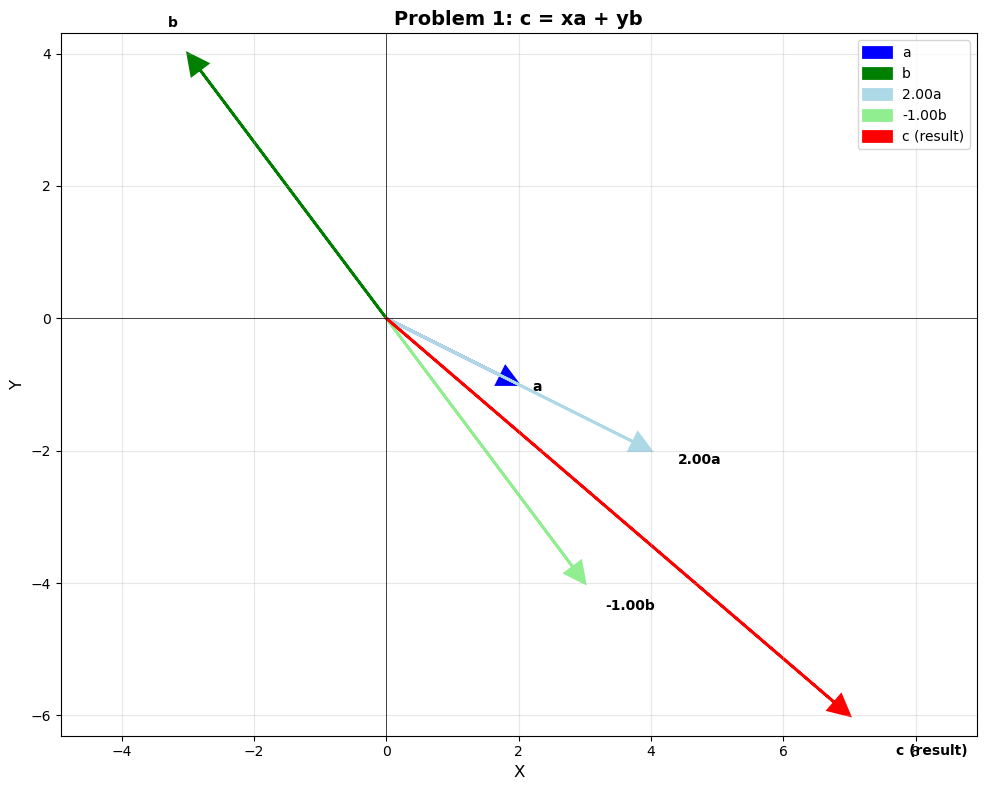

In [14]:
# Problem 1
a = np.array([2, -1])
b = np.array([-3, 4])
c = np.array([7, -6])

print("Problem 1: Is c a linear combination of a and b?")
print(f"a = {a}")
print(f"b = {b}")
print(f"c = {c}")
print()

solution = solve_linear_combination_2d(a, b, c)

if solution is not None:
    x, y = solution
    print(f"✅ YES! c IS a linear combination of a and b")
    print(f"\nSolution: x = {x:.4f}, y = {y:.4f}")
    print(f"\nVerification:")
    print(f"{x:.4f} * a = {x:.4f} * {a} = {x*a}")
    print(f"{y:.4f} * b = {y:.4f} * {b} = {y*b}")
    result = x*a + y*b
    print(f"\nResult: {x:.4f}*a + {y:.4f}*b = {result}")
    print(f"Target: c = {c}")
    print(f"\n✓ Match: {np.allclose(result, c)}")
    
    # Plot the vectors
    plot_vectors_2d(
        [a, b, x*a, y*b, c],
        ['a', 'b', f'{x:.2f}a', f'{y:.2f}b', 'c (result)'],
        ['blue', 'green', 'lightblue', 'lightgreen', 'red'],
        'Problem 1: c = xa + yb'
    )
else:
    print(f"❌ NO! c is NOT a linear combination of a and b")